In [6]:
import pandas as pd
import numpy as np
import plotly as py
import os

inpatient_files = []
outpatient_files = []

for direc,b,files in os.walk(r"E:\Data Science Projects\Data\CMS Data\Medicare Provider Utilization and Payment Data"):
    if "Inpatient" in direc:
        inpatient_files.extend([direc+"/"+x for x in files if ".csv" in x])
    if "Outpatient" in direc:
        outpatient_files.extend([direc+"/"+x for x in files if ".csv" in x])
        
inpatient_files, outpatient_files

(['E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Inpatient\\2011/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv',
  'E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Inpatient\\2012/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv',
  'E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Inpatient\\2013/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv',
  'E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Inpatient\\2014/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv',
  'E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Inpatient\\2015/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv'],
 ['E:\\Data Science Projects\\Data\\CMS Data\\Medicare Provider Utilization and Payment Data\\Outpatient\\2011/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv',
  'E:

In [12]:
def getData(f_type, year):
    if f_type not in ['inpatient','outpatient']:
        raise Exception('Incorrect file type. Input "inpatient" or "outpatient"')
    if type(year) != int:
        raise Exception("Year but be integer.")
    elif year not in [2011, 2012, 2013, 2014, 2015]:
        raise Exception("Year must be between 2011 and 2015, inclusive.")
    if f_type == 'inpatient':
        inp_file = [x for x in inpatient_files if str(year) in x][0]
        return pd.read_csv(inp_file)
    else:
        out_file = [x for x in outpatient_files if str(year) in x][0]
        return pd.read_csv(out_file)
        
inp_2011 = getData("inpatient", 2011)
inp_2011.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [48]:
groupby_hosp_2011 = inp_2011[["DRG Definition","Provider Name","Average Covered Charges"]].groupby(["Provider Name","DRG Definition"]).mean()
groupby_hosp_2011.reset_index(inplace=True)
nationwide_drg_2011 = inp_2011[["DRG Definition","Average Covered Charges"]].groupby(["DRG Definition"]).mean()

In [52]:
groupby_hosp_2011.iloc[0:10,:]

,Provider Name,DRG Definition,Average Covered Charges
0,ABBEVILLE GENERAL HOSPITAL,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,24959.58333
1,ABBEVILLE GENERAL HOSPITAL,192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...,17578.86667
2,ABBEVILLE GENERAL HOSPITAL,194 - SIMPLE PNEUMONIA & PLEURISY W CC,17579.66667
3,ABBEVILLE GENERAL HOSPITAL,195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC,13733.08696
4,ABBEVILLE GENERAL HOSPITAL,202 - BRONCHITIS & ASTHMA W CC/MCC,16665.56250
5,ABBEVILLE GENERAL HOSPITAL,291 - HEART FAILURE & SHOCK W MCC,27433.11111
6,ABBEVILLE GENERAL HOSPITAL,292 - HEART FAILURE & SHOCK W CC,16700.65385
7,ABBEVILLE GENERAL HOSPITAL,293 - HEART FAILURE & SHOCK W/O CC/MCC,11048.52632
8,ABBEVILLE GENERAL HOSPITAL,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",14184.41379
9,ABBEVILLE GENERAL HOSPITAL,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,30701.07692


In [68]:
print(nationwide_drg_2011.shape)
nationwide_drg_2011.iloc[0:10,:]

(100, 1)


,Average Covered Charges
DRG Definition,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30481.989332
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,24307.762697
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,48552.613451
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,29492.125031
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,23592.928898
069 - TRANSIENT ISCHEMIA,21195.608817
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC,25147.274243
101 - SEIZURES W/O MCC,21513.101125
149 - DYSEQUILIBRIUM,18870.970580


In [57]:
#Lets look at difference from the national mean.
merged_df = groupby_hosp_2011.merge(nationwide_drg_2011, on='DRG Definition',suffixes=['_hosp_avg','_national_avg'])
merged_df.loc[:,'diff'] = merged_df['Average Covered Charges_hosp_avg'] - merged_df['Average Covered Charges_national_avg']
merged_df.sort_values('diff',ascending=False).iloc[:10,:]

,Provider Name,DRG Definition,Average Covered Charges_hosp_avg,Average Covered Charges_national_avg,diff
70648,STANFORD HOSPITAL,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,929118.9091,143428.055060,785690.854040
70774,WASHINGTON HOSPITAL,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,918023.1818,143428.055060,774595.126740
146174,STANFORD HOSPITAL,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,637377.7143,163227.335864,474150.378436
70666,TEMPLE UNIVERSITY HOSPITAL,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,613926.6071,143428.055060,470498.552040
145892,NORTHBAY MEDICAL CENTER,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,628730.4000,163227.335864,465503.064136
70184,MEADOWLANDS HOSPITAL MEDICAL CENTER,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,602981.3784,143428.055060,459553.323340
69824,CEDARS-SINAI MEDICAL CENTER,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,596878.0263,143428.055060,453449.971240
69886,CROZER CHESTER MEDICAL CENTER,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,581801.9211,143428.055060,438373.866040
145337,WASHINGTON HOSPITAL,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,576296.0000,139186.354961,437109.645039
69807,CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,578212.7500,143428.055060,434784.694940


In [67]:
highest_divergent_drgs = merged_df[['DRG Definition','diff']].groupby('DRG Definition').sum().sort_values("diff",ascending=False)
div_drg_upper = highest_divergent_drgs.iloc[:10,:]
div_drg_lower = highest_divergent_drgs.iloc[-10:,:]
div_drg_upper, div_drg_lower

(                                                             diff
 DRG Definition                                                   
 853 - INFECTIOUS & PARASITIC DISEASES W O.R. PR...  479492.349343
 330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC     233965.950473
 314 - OTHER CIRCULATORY SYSTEM DIAGNOSES W MCC      227901.161553
 253 - OTHER VASCULAR PROCEDURES W CC                202269.725676
 460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC         198262.429364
 481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT...  193368.009025
 682 - RENAL FAILURE W MCC                           182775.591122
 064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  173857.466303
 439 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W CC  116307.406890
 189 - PULMONARY EDEMA & RESPIRATORY FAILURE         103507.685604,
                                                              diff
 DRG Definition                                                   
 191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC    -46519.9

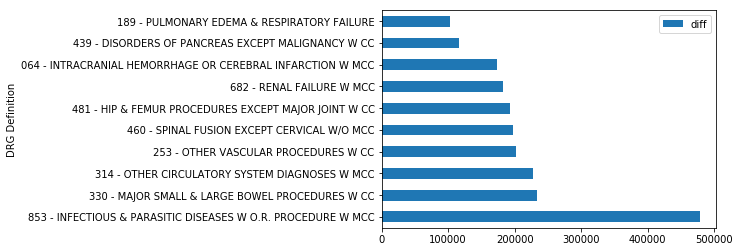

In [74]:
div_drg_upper.plot(kind='barh')

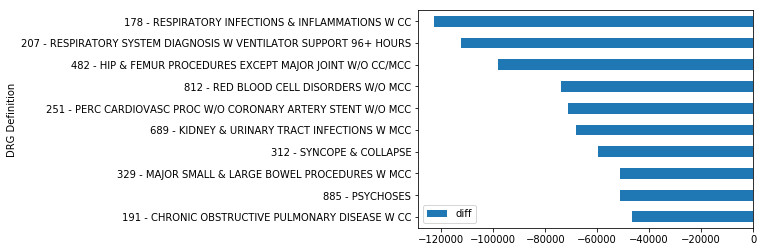

In [75]:
div_drg_lower.plot(kind='barh')